# Introduction 

On doit déterminer les 3 premiers pics du diffractogramme correspondant (en indiquant les indices hkl associés) pour un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å. 

### Mais qu'est-ce la cristallographie et à quoi sert-elle ?

La **cristallographie aux rayons X, radiocristallographie ou diffractométrie de rayons X**, plus connu sous le nom de **XRD** (X-ray diffraction), est une technique d'analyse fondée sur la diffraction des rayons X par la matière, particulièrement quand celle-ci est cristalline.

La diffraction des rayons X est une *diffusion élastique*, c'est-à-dire sans perte d'énergie des photons (longueurs d'onde inchangées), qui donne lieu à des interférences d'autant plus marquées que la matière est ordonnée.

Cette méthode utilise un faisceau de rayons X qui, rencontrant un cristal, est renvoyé dans des directions spécifiques déterminées par la longueur d'onde des rayons X et par les dimensions et l'orientation du réseau cristallin. Par la mesure des angles et de l'intensité des rayons diffractés, il est possible d'obtenir les dimensions de la maille cristalline, les symétries de la structure cristalline (groupe d'espace) et une image tridimensionnelle de la densité électronique dans la maille.

### Un petit mot sur les rayons X

*Les rayons X*, comme toutes les ondes électromagnétiques, provoquent un déplacement du nuage électronique par rapport au noyau dans les atomes. Ces oscillations induites provoquent une ré-émission d'ondes électromagnétiques de même fréquence : ce phénomène est appelé diffusion Rayleigh.

La longueur d'onde des rayons X étant de l'ordre de grandeur des distances interatomiques (quelques angström), les interférences des rayons diffusés vont être alternativement constructives ou destructives. Selon la direction de l'espace, on va donc avoir un flux important de photons X, ou au contraire très faible ; ces variations selon les directions forment le phénomène de diffraction des rayons X.

Les directions dans lesquelles les interférences sont constructives, appelées  **pics de diffraction**, peuvent être déterminées très simplement par la formule suivante, dite *loi de Bragg* :
$$ 2d \sin(\theta) = n \cdot \lambda$$ 

avec :
- *d* = distance interréticulaire, c'est-à-dire distance entre deux plans cristallographiques 
- *$\theta$* = demi-angle de déviation (moitié de l'angle entre le faisceau incident et la direction du détecteur)
- *n* = ordre de réflexion (nombre entier)
- *$\lambda$* = longueur d'onde des rayons X

Comme les plans cristallographiques peuvent être repérés par les *indices de Miller* *{hkl}*, on peut indexer les pics de diffraction selon ces indices.

In [13]:
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator

with MPRester ("dSIkoJuHEqTpcGXu8") as m:
    
    #Création de la structure du cristal à partir du MP
    struct = m.get_structure_by_material_id("mp-961660")

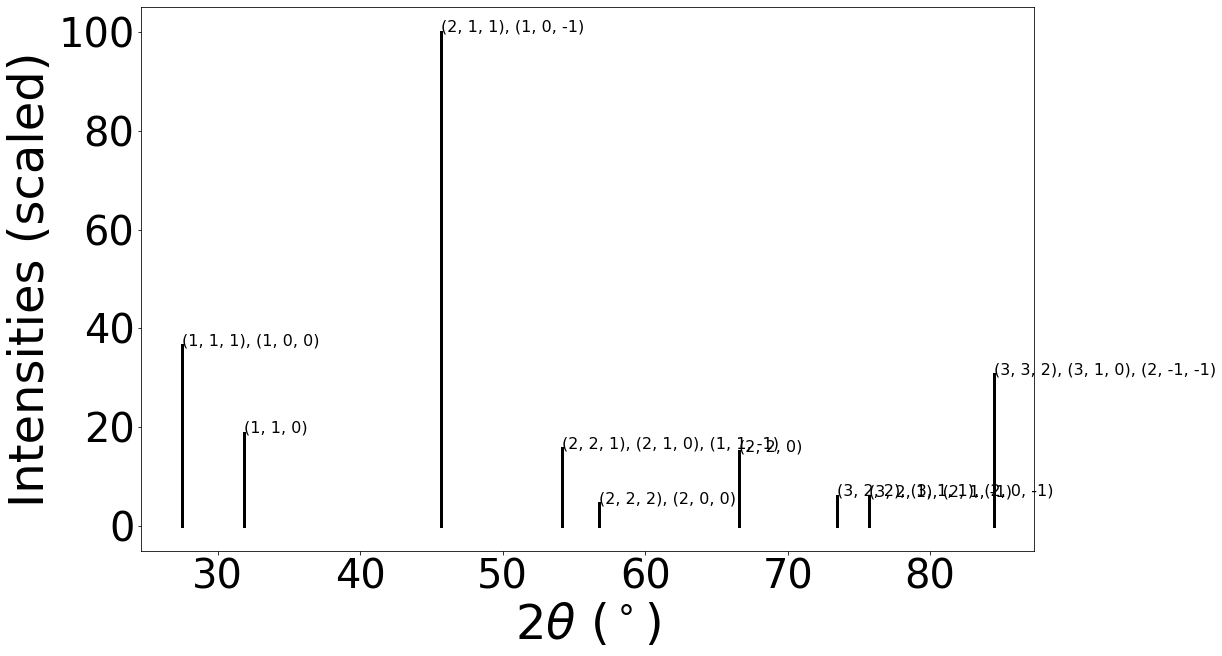

In [14]:
xrd = XRDCalculator(wavelength = 'CuKa', symprec = 0, debye_waller_factors = None)

pat = xrd.get_pattern(structure)

xrd.show_plot(struct)

# Analyse des 3 premiers pics

In [15]:
for i in range(1,4): 
    #Récupération de l'angle
    theta = pat.x[i-1]

    #Récupération de l'intensité
    I = pat.y[i-1]

    #Récupération des indices hkl
    hkl = pat.hkls[i-1]
    
    print('Angle du ',i, 'ième pic : ' + str(theta) + ' degrés')
    print('Intensité du ',i,'ième pic : ' + str(I))
    print('Indices hkl du ',i, 'ième pic :' + str(hkl))
    print('\n')

Angle du  1 ième pic : 27.49243212057119 degrés
Intensité du  1 ième pic : 36.61777281070271
Indices hkl du  1 ième pic :[{'hkl': (1, 1, 1), 'multiplicity': 2}, {'hkl': (1, 0, 0), 'multiplicity': 6}]


Angle du  2 ième pic : 31.850372066156012 degrés
Intensité du  2 ième pic : 18.891640709386365
Indices hkl du  2 ième pic :[{'hkl': (1, 1, 0), 'multiplicity': 6}]


Angle du  3 ième pic : 45.66453322690195 degrés
Intensité du  3 ième pic : 99.99999999999999
Indices hkl du  3 ième pic :[{'hkl': (2, 1, 1), 'multiplicity': 6}, {'hkl': (1, 0, -1), 'multiplicity': 6}]


